In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from random import shuffle

from keras.models import Model, Sequential
from keras.layers import Input, Dense, Concatenate, Reshape, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
SIZE = 50
EPOCHS = 10

In [3]:
PATH = 'C:/Users/Maedr3/Documents/packt/chapter 7/data/dogs-vs-cats/train/'

In [8]:
def get_label(file):
    class_label = file.split('.')[0]
    if class_label == 'dog': label_vector = [1,0]
    elif class_label == 'cat': label_vector = [0,1]
    return label_vector

In [9]:
def get_data():
    data = []
    files = os.listdir(PATH)
    for image in tqdm(files):
        
        label_vector = get_label(image)
        

        img = Image.open(PATH + image).convert('L')
        img = img.resize((SIZE,SIZE))
        
        data.append([np.asarray(img),np.array(label_vector)])
        
    shuffle(data)
    return data

In [10]:
data = get_data()

100%|██████████| 10000/10000 [00:57<00:00, 174.78it/s]


In [115]:
train = data[:7000]
test = data[7000:]

In [116]:
x_train = [data[0] for data in train]
y_train = [data[1] for data in train]
x_test = [data[0] for data in test]
y_test = [data[1] for data in test]

In [117]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [118]:
x_train = np.array(x_train).reshape(-1,50,50,1)
x_test = np.array(x_test).reshape(-1,50,50,1)

In [119]:
x_train.shape

(7000, 50, 50, 1)

In [120]:
y_test.shape

(3000, 2)

In [152]:
model = Sequential()
    
model.add(Conv2D(48, (3, 3), activation='relu', padding='same', input_shape=(50,50,1)))    
model.add(Conv2D(48, (3, 3), activation='relu'))    
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.10))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 50, 50, 48)        480       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 48, 48, 48)        20784     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 24, 24, 48)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 48)        192       
_________________________________________________________________
dropout_27 (Dropout)         (None, 24, 24, 48)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 27648)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               14156288  
__________

In [153]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics = ['accuracy'])

In [154]:
model_details = model.fit(x_train, y_train,
                    batch_size = 128, 
                    epochs = EPOCHS, 
                    validation_data= (x_test, y_test),
                    verbose=1)

Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - ETA: 4:22 - loss: 1.3072 - acc: 0.507 - ETA: 3:19 - loss: 3.1546 - acc: 0.523 - ETA: 2:55 - loss: 3.5732 - acc: 0.544 - ETA: 2:42 - loss: 4.0435 - acc: 0.533 - ETA: 2:32 - loss: 4.2560 - acc: 0.545 - ETA: 2:24 - loss: 4.5466 - acc: 0.544 - ETA: 2:18 - loss: 4.6761 - acc: 0.545 - ETA: 2:14 - loss: 4.7963 - acc: 0.550 - ETA: 2:10 - loss: 4.9476 - acc: 0.547 - ETA: 2:06 - loss: 5.0253 - acc: 0.550 - ETA: 2:02 - loss: 5.0148 - acc: 0.557 - ETA: 1:58 - loss: 5.0675 - acc: 0.561 - ETA: 1:55 - loss: 5.1216 - acc: 0.564 - ETA: 1:52 - loss: 5.1074 - acc: 0.569 - ETA: 1:49 - loss: 5.1793 - acc: 0.568 - ETA: 1:46 - loss: 5.2218 - acc: 0.569 - ETA: 1:43 - loss: 5.2363 - acc: 0.570 - ETA: 1:40 - loss: 5.2904 - acc: 0.565 - ETA: 1:37 - loss: 5.3344 - acc: 0.564 - ETA: 1:35 - loss: 5.3129 - acc: 0.566 - ETA: 1:32 - loss: 5.2780 - acc: 0.568 - ETA: 1:30 - loss: 5.2866 - acc: 0.566 - ETA: 1:27 - loss

7000/7000 [==============================] - ETA: 2:14 - loss: 0.2225 - acc: 0.937 - ETA: 2:14 - loss: 0.2193 - acc: 0.937 - ETA: 2:13 - loss: 0.2071 - acc: 0.940 - ETA: 2:11 - loss: 0.2106 - acc: 0.929 - ETA: 2:09 - loss: 0.2214 - acc: 0.920 - ETA: 2:06 - loss: 0.2150 - acc: 0.927 - ETA: 2:03 - loss: 0.2102 - acc: 0.928 - ETA: 2:00 - loss: 0.2075 - acc: 0.928 - ETA: 1:58 - loss: 0.2038 - acc: 0.930 - ETA: 1:55 - loss: 0.1974 - acc: 0.932 - ETA: 1:53 - loss: 0.2045 - acc: 0.926 - ETA: 1:50 - loss: 0.2036 - acc: 0.924 - ETA: 1:47 - loss: 0.2056 - acc: 0.921 - ETA: 1:45 - loss: 0.2084 - acc: 0.919 - ETA: 1:42 - loss: 0.2122 - acc: 0.919 - ETA: 1:40 - loss: 0.2164 - acc: 0.918 - ETA: 1:37 - loss: 0.2177 - acc: 0.916 - ETA: 1:34 - loss: 0.2201 - acc: 0.914 - ETA: 1:32 - loss: 0.2209 - acc: 0.915 - ETA: 1:29 - loss: 0.2206 - acc: 0.916 - ETA: 1:27 - loss: 0.2219 - acc: 0.915 - ETA: 1:24 - loss: 0.2220 - acc: 0.915 - ETA: 1:22 - loss: 0.2231 - acc: 0.915 - ETA: 1:19 - loss: 0.2221 - acc: 0.9

In [161]:
score = model.evaluate(x_test, y_test)

3000/3000 [==============================] - ETA: 19 - ETA: 17 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 20s 7ms/step
Accuracy: 70.43%


In [167]:
print("Accuracy:  {0:.2f}%".format(score[1]*100))

Accuracy: 70.43%


In [162]:
y_pred = model.predict(x_test)

In [163]:
correct_indices = np.nonzero(np.argmax(y_pred,axis=1) == np.argmax(y_test,axis=1))[0]
incorrect_indices = np.nonzero(np.argmax(y_pred,axis=1) != np.argmax(y_test,axis=1))[0]

In [164]:
labels = ['dog', 'cat']

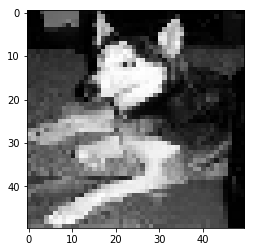

Prediction: cat


In [165]:
image = 5
plt.imshow(x_test[incorrect_indices[image]].reshape(50,50),  cmap=plt.get_cmap('gray'))
plt.show()
print("Prediction: {0}".format(labels[np.argmax(y_pred[incorrect_indices[image]])]))

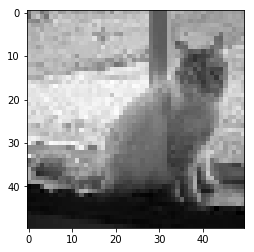

Prediction: cat


In [166]:
image = 4
plt.imshow(x_test[correct_indices[image]].reshape(50,50), cmap=plt.get_cmap('gray'))
plt.show()
print("Prediction: {0}".format(labels[np.argmax(y_pred[correct_indices[image]])]))

In [1]:
print("Accuracy: 96.10%")

Accuracy: 96.10%
